<a href="https://colab.research.google.com/github/vavme/Diet-Quality-and-Covid-19-2020/blob/main/Diet_Quality_and_Covid_19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

File Link Download:

[Food_Supply_Quantity_kg_Data.csv](https://drive.google.com/uc?export=download&id=1cxisB1V00IBTDmuogSUCKQsmfmuwWRD5)

[Protein_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1g0WrtQrsQ8gXTOAVe-zyWTL2BaMFS6KX)

[Fat_Supply_Quantity_Data.csv](https://drive.google.com/uc?export=download&id=1Zeza76v_VH3i6fjP1eHOjfZ2xWQDY0Qp)

[Supply_Food_Data_Descriptions.csv](https://drive.google.com/uc?export=download&id=11JJ1CVbxaTWo8RSm8KmkrBCqHwCTIykh)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import Semua Data
df_food = pd.read_csv('Food_Supply_Quantity_kg_Data.csv')
df_protein = pd.read_csv('Protein_Supply_Quantity_Data.csv')
df_fat = pd.read_csv('Fat_Supply_Quantity_Data.csv')
df_category = pd.read_csv('Supply_Food_Data_Descriptions.csv')

In [ ]:
all_columns = df_food.columns.tolist()
print(f'All Columns : {all_columns} \n\n')

supply_columns = df_food.columns[df_food.columns.isin(df_category.Categories)].tolist()
print(f'Supply Columns : {supply_columns} \n\n')

non_supply_columns = df_food.columns[df_food.columns.isin(df_category.Categories)==False].tolist()
print(f'Non Supply Columns : {non_supply_columns} \n\n')

All Columns : ['Country', 'Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths', 'Recovered', 'Active', 'Population', 'Unit (all except Population)'] 


Supply Columns : ['Alcoholic Beverages', 'Animal fats', 'Animal Products', 'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs', 'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat', 'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops', 'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar & Sweeteners', 'Sugar Crops', 'Treenuts', 'Vegetable Oils', 'Vegetables', 'Vegetal Products'] 


Non Supply Columns : ['Country', 'Obesity', 'Unde

In [ ]:
df_non_supply_new = df_food[non_supply_columns]
df_food_new = df_food[['Country']+supply_columns]
df_protein_new = df_protein[['Country']+supply_columns]
df_fat_new = df_fat[['Country']+supply_columns]

In [ ]:
df1 = pd.merge(df_food_new,df_protein_new, on = 'Country' , suffixes=('_food','_protein'), how ='outer')
df_fat1 = df_fat[supply_columns].add_suffix('_fat')
df2 = pd.concat([df1,df_fat1], axis=1)
df_full = pd.merge(df2, df_non_supply_new, on ='Country', how = 'outer')

In [ ]:
df_full

,Country,Alcoholic Beverages_food,Animal fats_food,Animal Products_food,"Aquatic Products, Other_food",Cereals - Excluding Beer_food,Eggs_food,"Fish, Seafood_food",Fruits - Excluding Wine_food,Meat_food,...,Vegetables_fat,Vegetal Products_fat,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
0,Afghanistan,0.0014,0.1973,9.4341,0.0000,24.8097,0.2099,0.0350,5.3495,1.2020,...,0.3593,28.3684,4.5,29.8,0.098885,0.003635,0.078496,0.016754,38928000.0,%
1,Albania,1.6719,0.1357,18.7684,0.0000,5.7817,0.5815,0.2126,6.7861,1.8845,...,0.6503,17.9998,22.3,6.2,0.366667,0.011240,0.217970,0.137456,2838000.0,%
2,Algeria,0.2711,0.0282,9.6334,0.0000,13.6816,0.5277,0.2416,6.3801,1.1305,...,0.5145,35.5857,26.6,3.9,0.105176,0.003521,0.074363,0.027292,44357000.0,%
3,Angola,5.8087,0.0560,4.9278,0.0000,9.1085,0.0587,1.7707,6.0005,2.0571,...,0.1231,34.7010,6.8,25,0.009166,0.000369,0.003736,0.005061,32522000.0,%
4,Antigua and Barbuda,3.5764,0.0087,16.6613,0.0000,5.9960,0.2274,4.1489,10.7451,5.6888,...,0.2469,22.2995,19.1,NaN,0.096939,0.003061,0.092857,0.001020,98000.0,%
5,Argentina,4.2672,0.2234,19.3454,0.0000,8.4102,0.9979,0.4693,6.0435,7.0421,...,0.1878,19.6449,28.5,4.6,1.075450,0.022322,0.787597,0.265531,45377000.0,%
6,Armenia,0.4014,0.1833,13.5640,0.0000,7.2982,0.5783,0.2896,6.0989,2.2675,...,0.8717,20.3384,20.9,4.3,1.517084,0.030447,1.357273,0.129364,2956000.0,%
7,Australia,5.5436,0.3143,21.4175,0.0033,5.4979,0.4428,1.4264,4.1883,6.7049,...,0.2144,25.8901,30.4,<2.5,0.102404,0.002990,0.087761,0.011653,25754000.0,%
8,Austria,7.0215,0.8555,19.5654,0.0011,6.2116,0.7884,0.7562,4.6069,4.6810,...,0.2039,22.1762,21.9,<2.5,0.331624,0.008369,0.283823,0.039432,8914000.0,%
9,Azerbaijan,3.5969,0.2544,11.6416,0.0000,13.0898,0.5593,0.2020,4.7988,2.1513,...,0.6534,17.8802,19.9,<2.5,0.370182,0.005451,0.344648,0.020083,10108000.0,%


In [ ]:
#Sort
df_death_rank = df_non_supply_new.sort_values('Deaths', ascending=False).reset_index(drop=True)
df_death_rank.index = np.arange(1, len(df_death_rank)+1)
print(df_death_rank)


,Country,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
1,Peru,19.1,9.7,2.102050,0.090903,1.591064,0.420083,32824000.0,%
2,Belgium,24.5,<2.5,0.770899,0.086053,0.161320,0.523526,11515000.0,%
3,United Kingdom,29.5,<2.5,0.524793,0.062006,0.002716,0.460071,67160000.0,%
4,Spain,27.1,<2.5,1.103283,0.061963,0.315684,0.725637,47635000.0,%
5,Bolivia,18.7,17.1,1.045337,0.060638,0.628815,0.355884,11633000.0,%
6,Ecuador,19.3,7.9,0.628702,0.060396,0.521055,0.047250,17511000.0,%
7,Brazil,22.3,<2.5,1.958243,0.059940,1.675637,0.222666,211812000.0,%
8,Chile,28.8,2.7,2.179117,0.059846,2.032445,NaN,19470000.0,%
9,Italy,22.9,<2.5,0.462359,0.058964,0.348677,0.054718,60296000.0,%
10,United States of America,37.3,<2.5,1.909986,0.057357,0.707398,NaN,329878000.0,%


In [ ]:
# Indonesian rank
Indonesia_death_rank = df_death_rank.index[df_death_rank['Country']=='Indonesia'].tolist()
print(f'Berdasarkan tingkat kematian akibat COVID-19, Indonesia berada di urutan ke : {Indonesia_death_rank}')

Berdasarkan tingkat kematian akibat COVID-19, Indonesia berada di urutan ke : [85]


In [ ]:
df_death_rank.iloc[84]

Country                           Indonesia
Obesity                                 6.9
Undernourished                          8.3
Confirmed                          0.072492
Deaths                           0.00299184
Recovered                           0.05176
Active                            0.0177402
Population                      2.71739e+08
Unit (all except Population)              %
Name: 85, dtype: object

In [ ]:
# Percentage for Indonesia

meninggal_persen = df_death_rank['Deaths'][85]
meninggal = df_death_rank['Population'][85] * meninggal_persen

print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal_persen, 10)}% dari jumlah populasi.') # 10 digit
print(f'Jumlah yang meninggal di Indonesia ada {round(meninggal)} orang.')

Jumlah yang meninggal di Indonesia ada 0.0029918414% dari jumlah populasi.
Jumlah yang meninggal di Indonesia ada 813000.0 orang.


In [ ]:
# Binning
labels = ['Sangat Tidak Banyak', 'Tidak Banyak', 'Sedang', 'Cukup Banyak', 'Sangat Banyak']
df_fat['Confirmed Category'] = pd.qcut(df_fat['Confirmed'], 5, labels=labels)

In [ ]:
# Grouping
cols = ['Obesity', 'Meat', 'Fruits - Excluding Wine', 'Fish, Seafood', 'Animal Products', 'Vegetal Products']
groupby_confirmed = df_fat.groupby('Confirmed Category')[cols].mean()
groupby_confirmed

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.856250,9.902970,0.456676,1.024506,16.952912,33.047858
Tidak Banyak,15.481250,8.023331,0.758656,0.777113,17.719428,32.280200
Sedang,19.378125,8.567009,0.460409,0.790903,21.461984,28.538681
Cukup Banyak,22.446875,9.819503,0.495053,0.636666,24.095684,25.904362
Sangat Banyak,24.300000,10.505816,0.585538,0.800600,23.609034,26.390828


In [ ]:
groupby_confirmed.to_csv('groupby_confirmed.csv')

In [ ]:
df = groupby_confirmed
display(df)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,10.856250,9.902970,0.456676,1.024506,16.952912,33.047858
Tidak Banyak,15.481250,8.023331,0.758656,0.777113,17.719428,32.280200
Sedang,19.378125,8.567009,0.460409,0.790903,21.461984,28.538681
Cukup Banyak,22.446875,9.819503,0.495053,0.636666,24.095684,25.904362
Sangat Banyak,24.300000,10.505816,0.585538,0.800600,23.609034,26.390828


In [ ]:
# Normalisasi
df_norm = (df - df.min())/(df.max() - df.min())
display(df_norm)

,Obesity,Meat,Fruits - Excluding Wine,"Fish, Seafood",Animal Products,Vegetal Products
Confirmed Category,,,,,,
Sangat Tidak Banyak,0.000000,0.757160,0.000000,1.000000,0.000000,1.000000
Tidak Banyak,0.344026,0.000000,1.000000,0.362125,0.107314,0.892538
Sedang,0.633891,0.219006,0.012364,0.397683,0.631278,0.368772
Cukup Banyak,0.862157,0.723538,0.127086,0.000000,1.000000,0.000000
Sangat Banyak,1.000000,1.000000,0.426722,0.422685,0.931868,0.068099


In [ ]:
#Bar Plot
x = np.arange(0,12,2)
y = []
for a in df_norm.index:
    y.append(df_norm.loc[a])

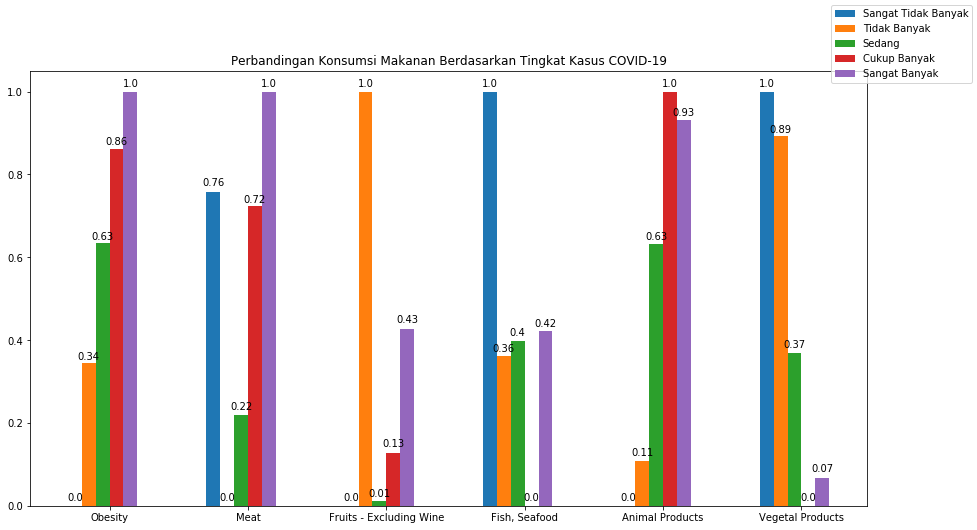

In [ ]:
fig, ax = plt.subplots(figsize = (15,8))

def autolabel(rects):
    for rect in rects:
        height = round(rect.get_height(),2)
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')
        
label = df_norm.index
a = 0
for b in label :
    z = []
    for c in y[a] :
        z.append(c)
    autolabel(ax.bar(x,z, width = 0.2, label = label[a], edgecolor='none'))
    x = x+0.2
    a = a+1
    
x_val = cols
plt.xticks(x-0.5,x_val)
fig.legend(loc='upper right')
ax.set_title('Perbandingan Konsumsi Makanan Berdasarkan Tingkat Kasus COVID-19')


plt.show()

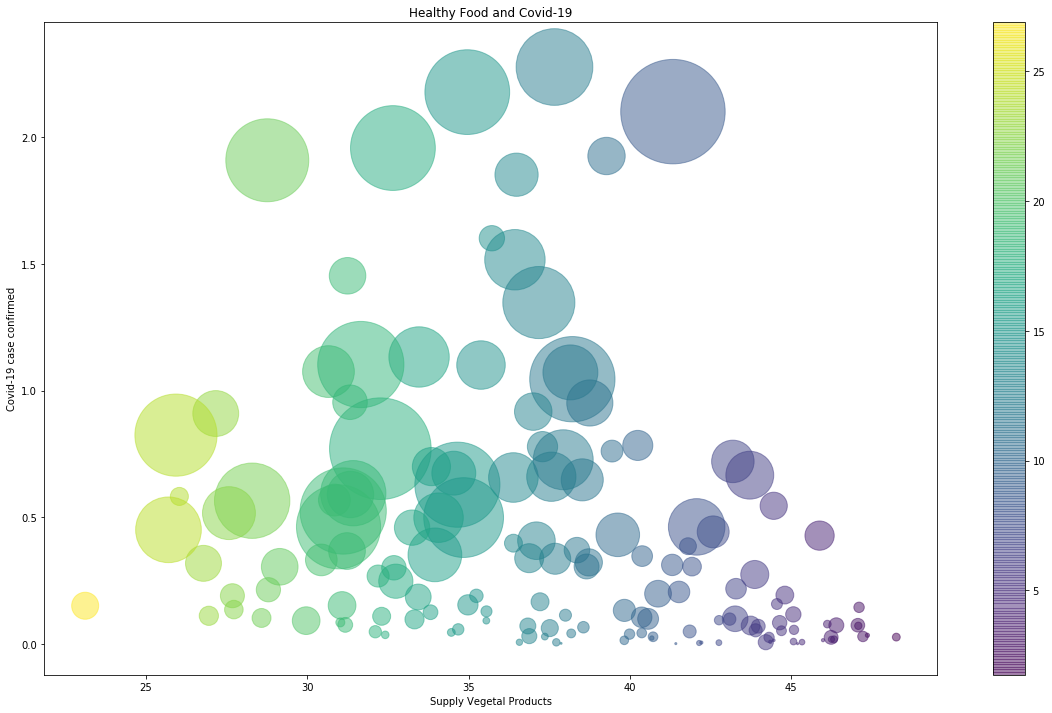

In [ ]:
#Scatter Plot
fig, ax = plt.subplots(figsize=(20, 12))

mapbar = ax.scatter(df_food['Vegetal Products'], df_food['Confirmed'], s = df_food['Deaths']*120000, c = df_food['Animal Products'],
                    alpha = 0.5, cmap = 'viridis')
fig.colorbar(mapbar)
ax.set_title('Healthy Food and Covid-19')
ax.set_xlabel('Supply Vegetal Products')
ax.set_ylabel('Covid-19 case confirmed')
plt.show()